In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import f1_score, classification_report, log_loss, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [2]:
data_train = pd.read_csv('mushroom_train.csv', usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
data_new_train = data_train.to_numpy()

In [3]:
# Load the data_train DataFrame
data_train = pd.read_csv('mushroom_train.csv', usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Calculate the Pearson correlation coefficient for all pairs of columns
corr_matrix = data_train.corr()

# Display the correlation matrix
print(corr_matrix)

              cap-diameter  stem-height  stem-width
cap-diameter      1.000000     0.423171    0.695804
stem-height       0.423171     1.000000    0.436069
stem-width        0.695804     0.436069    1.000000


<ipython-input-3-73879a0920ae>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_train.corr()


In [4]:
categorical_col = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season','class']
categorical_data_train = data_train[categorical_col]
encoded_data_train = pd.get_dummies(categorical_data_train, prefix = categorical_col, prefix_sep = '_')

In [5]:
numerical_col_train = data_train[['cap-diameter', 'stem-height', 'stem-width']]
scaler = StandardScaler()
numerical_col_scaled_train = scaler.fit_transform(numerical_col_train)
numerical_data_train = pd.DataFrame(numerical_col_scaled_train, columns = numerical_col_train.columns)

In [6]:
final_data_train = pd.concat([numerical_data_train, encoded_data_train], axis = 1)

In [7]:
df_temp = pd.DataFrame({'zeros': [0] * 42748})
df_temp.loc[final_data_train.iloc[:,-2] == 1, 'zeros'] = 0
df_temp.loc[final_data_train.iloc[:,-1] == 1, 'zeros'] = 1

In [8]:
final_data_train = final_data_train.drop(final_data_train.columns[-2:], axis = 1)

In [9]:
final_data_train_watch = pd.concat([final_data_train, df_temp], axis = 1)

In [10]:
final_data_train_watch = pd.concat([final_data_train, df_temp], axis = 1)
final_data_train_watch = final_data_train_watch.rename(columns = {'<old_column_name>': 'label'})

In [11]:
# define the columns of interest
cols_of_interest = ['stem-width', 'stem-height', 'cap-diameter']

# calculate the correlation matrix
corr_matrix = final_data_train.corr(method = 'pearson')

# filter the correlation matrix to only include rows or columns with 'stem-width', 'stem-height', or 'cap-diameter'
corr_filtered = corr_matrix[(corr_matrix.index.isin(cols_of_interest)) | (corr_matrix.columns.isin(cols_of_interest))]

# create a copy of the filtered correlation matrix for sorting
corr_sorted = corr_filtered.abs().unstack().sort_values(ascending = False).reset_index()

# remove self-correlations (correlations of features with themselves)
corr_sorted = corr_sorted[corr_sorted['level_0'] != corr_sorted['level_1']]

# rename the columns of the sorted correlation matrix
corr_sorted.columns = ['feature_1', 'feature_2', 'correlation_coefficient']

# filter the sorted correlation matrix to only include rows or columns with 'stem-width', 'stem-height', or 'cap-diameter'
corr_sorted_filtered = corr_sorted[(corr_sorted['feature_1'].isin(cols_of_interest)) | (corr_sorted['feature_2'].isin(cols_of_interest))]

# display the top 5 positive and top 5 negative correlation coefficient values with their corresponding row and column names
print('Top 10 positive correlations:')
print(corr_sorted_filtered.head(10))

print('\nTop 10 negative correlations:')
print(corr_sorted_filtered.tail(10)[::-1])

Top 10 positive correlations:
            feature_1     feature_2  correlation_coefficient
3        cap-diameter    stem-width                 0.695804
4          stem-width  cap-diameter                 0.695804
5         stem-height    stem-width                 0.436069
6          stem-width   stem-height                 0.436069
7         stem-height  cap-diameter                 0.423171
8        cap-diameter   stem-height                 0.423171
9         ring-type_m   stem-height                 0.406376
10  gill-attachment_p    stem-width                 0.400621
11  gill-attachment_p  cap-diameter                 0.353896
12        ring-type_f   stem-height                 0.332793

Top 10 negative correlations:
          feature_1     feature_2  correlation_coefficient
275    gill-color_o    stem-width                 0.000822
274     cap-color_e  cap-diameter                 0.000841
273    stem-color_u   stem-height                 0.000941
272     ring-type_l    stem-widt

In [12]:
filtered_cols = final_data_train.columns

In [13]:
final_data_train = pd.concat([final_data_train, df_temp], axis = 1)

In [14]:
# select the rows where 'ring-type_m' is 1
selected_rows_shape_m = final_data_train_watch[final_data_train_watch['ring-type_m'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_m, columns=final_data_train_watch.columns)

selected_data_m = final_data_train_watch.loc[final_data_train_watch['ring-type_m'] == 1].copy()

stem_width_min = selected_data_m['stem-width'].min()
stem_width_max = selected_data_m['stem-width'].max()
stem_width_mean = selected_data_m['stem-width'].mean()

selected_data_m['stem_width_ring_type_m_min'] = stem_width_min
selected_data_m['stem_width_ring_type_m_max'] = stem_width_max
selected_data_m['stem_width_ring_type_m_mean'] = stem_width_mean
selected_data_m = selected_data_m.rename(columns = {'zeros': 'label1'})

In [15]:
# select the rows where 'gill-attachment_p' is 1
selected_rows_shape_p = final_data_train_watch[final_data_train_watch['gill-attachment_p'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_p, columns = final_data_train_watch.columns)

selected_data_p = final_data_train_watch.loc[final_data_train_watch['gill-attachment_p'] == 1].copy()

stem_width_min = selected_data_p['stem-width'].min()
stem_width_max = selected_data_p['stem-width'].max()
stem_width_mean = selected_data_p['stem-width'].mean()

selected_data_p['stem_width_gill_attachment_p_min'] = stem_width_min
selected_data_p['stem_width_gill_attachment_p_max'] = stem_width_max
selected_data_p['stem_width_gill_attachment_p_mean'] = stem_width_mean
selected_data_p = selected_data_p.rename(columns = {'zeros': 'label2'})

In [16]:
# select the rows where 'ring-type_f' is 1
selected_rows_shape_f = final_data_train_watch[final_data_train_watch['ring-type_f'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_f, columns = final_data_train_watch.columns)

selected_data_f = final_data_train_watch.loc[final_data_train_watch['ring-type_f'] == 1].copy()

stem_width_min = selected_data_f['stem-height'].min()
stem_width_max = selected_data_f['stem-height'].max()
stem_width_mean = selected_data_f['stem-height'].mean()

selected_data_f['stem_height_ring_type_f_min'] = stem_width_min
selected_data_f['stem_height_ring_type_f_max'] = stem_width_max
selected_data_f['stem_height_ring_type_f_mean'] = stem_width_mean
selected_data_f = selected_data_f.rename(columns = {'zeros': 'label3'})

In [17]:
# select the rows where 'gill-color_o' is 1
selected_rows_shape_o = final_data_train_watch[final_data_train_watch['gill-color_o'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_o, columns = final_data_train_watch.columns)

selected_data_o = final_data_train_watch.loc[final_data_train_watch['gill-color_o'] == 1].copy()

stem_width_min = selected_data_o['stem-width'].min()
stem_width_max = selected_data_o['stem-width'].max()
stem_width_mean = selected_data_o['stem-width'].mean()

selected_data_o['stem_width_gill_color_o_min'] = stem_width_min
selected_data_o['stem_width_gill_color_o_max'] = stem_width_max
selected_data_o['stem_width_gill_color_o_mean'] = stem_width_mean
selected_data_o = selected_data_o.rename(columns = {'zeros': 'label4'})

In [18]:
# select the rows where 'cap-color_e' is 1
selected_rows_shape_e = final_data_train_watch[final_data_train_watch['cap-color_e'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_e, columns = final_data_train_watch.columns)

selected_data_e = final_data_train_watch.loc[final_data_train_watch['cap-color_e'] == 1].copy()

stem_width_min = selected_data_e['cap-diameter'].min()
stem_width_max = selected_data_e['cap-diameter'].max()
stem_width_mean = selected_data_e['cap-diameter'].mean()

selected_data_e['cap_diameter_cap_color_e_min'] = stem_width_min
selected_data_e['cap_diameter_cap_color_e_max'] = stem_width_max
selected_data_e['cap_diameter_cap_color_e_mean'] = stem_width_mean
selected_data_e = selected_data_e.rename(columns = {'zeros': 'label5'})

In [19]:
# select the rows where 'cap-shape_p' is 1
selected_rows_shape_p_only = final_data_train_watch[final_data_train_watch['cap-shape_p'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_p_only, columns = final_data_train_watch.columns)

selected_data_p_only = final_data_train_watch.loc[final_data_train_watch['cap-shape_p'] == 1].copy()

cap_diameter_min = selected_data_p_only['cap-diameter'].min()
cap_diameter_max = selected_data_p_only['cap-diameter'].max()
cap_diameter_mean = selected_data_p_only['cap-diameter'].mean()

selected_data_p_only['cap_diameter_p_min'] = cap_diameter_min
selected_data_p_only['cap_diameter_p_max'] = cap_diameter_max
selected_data_p_only['cap_diameter_p_mean'] = cap_diameter_mean
selected_data_p_only = selected_data_p_only.rename(columns = {'zeros': 'label6'})

In [20]:
concatenated_data = pd.concat([selected_data_m, selected_data_p, selected_data_f, selected_data_o, selected_data_e, selected_data_p_only], axis = 0)

# replace all NaN values in concatenated_data with 0s
concatenated_data = concatenated_data.fillna(0)

In [21]:
# Define a function to check if any of the label columns has '1'
def has_label(row):
    label_cols = ['label1', 'label2', 'label3', 'label4', 'label5', 'label6']
    
    for col in label_cols:
        
        if row[col] == 1:
            return 1
    return 0

# Create the new 'label' column by applying the 'has_label' function to each row
concatenated_data['label'] = concatenated_data.apply(has_label, axis = 1)

In [22]:
column_names = concatenated_data.columns.tolist()

In [23]:
shuffled_data = concatenated_data.sample(frac = 1, random_state = 42)

In [24]:
shuffled_data_train = shuffled_data.iloc[:, :-1]
label_train = shuffled_data.iloc[:, -1]
shuffled_data_train = shuffled_data_train.drop(['label1', 'label2', 'label3', 'label4', 'label5', 'label6'], axis = 1)

# Apply PCA to the shuffled data
pca = PCA(n_components = 70)
pcs = pca.fit_transform(shuffled_data_train)

# Get the names of the original features with the highest absolute loadings for each component
num_top_features = 70  # change this to the desired number of top features
top_feature_names = []

for i in range(pca.n_components_):
    component_loadings = abs(pca.components_[i])
    sorted_indices = component_loadings.argsort()[::-1]
    top_feature_indices = sorted_indices[:num_top_features]
    top_feature_names.append(shuffled_data_train.columns[top_feature_indices].tolist())

# Concatenate the lists of top feature names into a single list
all_top_feature_names = [name for sublist in top_feature_names for name in sublist]

# Count the frequency of each feature and sort them in descending order
feature_counts = pd.Series(all_top_feature_names).value_counts().sort_values(ascending = False)

# Get the top 10 most frequent features
top_features = feature_counts.index[:70].tolist()

# Print the list of top feature names
print(top_features)

['stem-color_e', 'gill-attachment_p', 'gill-color_y', 'cap-surface_g', 'gill-attachment_s', 'gill-color_p', 'gill-color_o', 'cap-shape_b', 'cap-color_w', 'cap-surface_y', 'cap-color_y', 'cap-color_g', 'gill-attachment_e', 'stem-color_n', 'cap-shape_o', 'gill-color_n', 'habitat_m', 'gill-attachment_d', 'stem-color_g', 'cap-color_e', 'habitat_l', 'gill-color_e', 'cap-surface_k', 'stem-color_y', 'cap-shape_f', 'cap-shape_s', 'habitat_g', 'stem_width_gill_color_o_max', 'stem-color_o', 'gill-color_g', 'ring-type_f', 'cap-color_o', 'cap-surface_e', 'gill-color_f', 'gill-spacing_f', 'gill-spacing_d', 'cap-surface_h', 'cap-color_p', 'stem-color_f', 'gill-color_w', 'stem-color_w', 'cap-shape_x', 'cap-shape_c', 'cap-surface_i', 'gill-attachment_f', 'habitat_h', 'cap_diameter_p_max', 'cap-surface_d', 'season_w', 'gill-color_k', 'cap-surface_s', 'cap-color_n', 'gill-attachment_x', 'has-ring_f', 'cap-color_u', 'gill-attachment_a', 'cap_diameter_cap_color_e_max', 'season_s', 'has-ring_t', 'stem-heig

In [25]:
if 'label5' in shuffled_data_train.columns:
    print("Column exists in shuffled_data_train")
else:
    print("Column does not exist in shuffled_data_train")

Column does not exist in shuffled_data_train


In [26]:
# Get the indices of the columns in shuffled_data that correspond to the top 70 features
top_feature_indices = [shuffled_data_train.columns.get_loc(feature) for feature in top_features[:70]]

# Create a new dataframe that contains only the top 70 features
top_70_features_data = shuffled_data_train.iloc[:, top_feature_indices]

In [27]:
data_test = pd.read_csv('mushroom_test.csv', usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
data_new_test = data_test.to_numpy()

# Calculate the Pearson correlation coefficient for all pairs of columns
corr_matrix = data_test.corr()

# Display the correlation matrix
print(corr_matrix)

categorical_col = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season','class']
categorical_data_test = data_test[categorical_col]
encoded_data_test = pd.get_dummies(categorical_data_test, prefix = categorical_col, prefix_sep='_')
print(encoded_data_test.columns.tolist())

              cap-diameter  stem-height  stem-width
cap-diameter      1.000000     0.421315    0.694313
stem-height       0.421315     1.000000    0.436266
stem-width        0.694313     0.436266    1.000000
['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'g

<ipython-input-27-b58a634a196b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_test.corr()


In [28]:
numerical_col_test = data_test[['cap-diameter', 'stem-height', 'stem-width']]
scaler = StandardScaler()
numerical_col_scaled_test = scaler.fit_transform(numerical_col_test)
numerical_data_test = pd.DataFrame(numerical_col_scaled_test, columns = numerical_col_test.columns)

final_data_test = pd.concat([numerical_data_test, encoded_data_test], axis = 1)
print(final_data_test.columns.tolist())

['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e', 'stem

In [29]:
df_temp = pd.DataFrame({'zeros': [0] * (final_data_test.shape[0])})
df_temp.loc[final_data_test.iloc[:,-2] == 1, 'zeros'] = 0
df_temp.loc[final_data_test.iloc[:,-1] == 1, 'zeros'] = 1

In [30]:
final_data_test = final_data_test.drop(final_data_test.columns[-2:], axis = 1)
print(final_data_test.columns.tolist())

['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e', 'stem

In [31]:
final_data_test_watch = pd.concat([final_data_test, df_temp], axis = 1)
final_data_test_watch = final_data_test_watch.rename(columns = {'<old_column_name>': 'label'})
print(final_data_test_watch.columns.tolist())

['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e', 'stem

In [32]:
# define the columns of interest
cols_of_interest = ['stem-width', 'stem-height', 'cap-diameter']

# calculate the correlation matrix
corr_matrix = final_data_test.corr(method = 'pearson')

# filter the correlation matrix to only include rows or columns with 'stem-width', 'stem-height', or 'cap-diameter'
corr_filtered = corr_matrix[(corr_matrix.index.isin(cols_of_interest)) | (corr_matrix.columns.isin(cols_of_interest))]

# create a copy of the filtered correlation matrix for sorting
corr_sorted = corr_filtered.abs().unstack().sort_values(ascending = False).reset_index()

# remove self-correlations (correlations of features with themselves)
corr_sorted = corr_sorted[corr_sorted['level_0'] != corr_sorted['level_1']]

# rename the columns of the sorted correlation matrix
corr_sorted.columns = ['feature_1', 'feature_2', 'correlation_coefficient']

# filter the sorted correlation matrix to only include rows or columns with 'stem-width', 'stem-height', or 'cap-diameter'
corr_sorted_filtered = corr_sorted[(corr_sorted['feature_1'].isin(cols_of_interest)) | (corr_sorted['feature_2'].isin(cols_of_interest))]

# display the top 5 positive and top 5 negative correlation coefficient values with their corresponding row and column names
print('Top 10 positive correlations:')
print(corr_sorted_filtered.head(10))

print('\nTop 10 negative correlations:')
print(corr_sorted_filtered.tail(10)[::-1])

filtered_cols = final_data_test.columns

final_data_test = pd.concat([final_data_test, df_temp], axis = 1)

print(final_data_test.columns.tolist())

Top 10 positive correlations:
            feature_1     feature_2  correlation_coefficient
3        cap-diameter    stem-width                 0.694313
4          stem-width  cap-diameter                 0.694313
5         stem-height    stem-width                 0.436266
6          stem-width   stem-height                 0.436266
7         ring-type_m   stem-height                 0.433530
8         stem-height  cap-diameter                 0.421315
9        cap-diameter   stem-height                 0.421315
10  gill-attachment_p    stem-width                 0.414484
11  gill-attachment_p  cap-diameter                 0.372388
12        ring-type_f   stem-height                 0.323684

Top 10 negative correlations:
             feature_1     feature_2  correlation_coefficient
275       gill-color_o    stem-width                 0.000028
274        ring-type_l    stem-width                 0.000548
273          habitat_u    stem-width                 0.000694
272  gill-attachment

In [33]:
# select the rows where 'ring-type_m' is 1
selected_rows_shape_m = final_data_test_watch[final_data_test_watch['ring-type_m'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_m, columns = final_data_test_watch.columns)

selected_data_m = final_data_test_watch.loc[final_data_test_watch['ring-type_m'] == 1].copy()

stem_width_min = selected_data_m['stem-width'].min()
stem_width_max = selected_data_m['stem-width'].max()
stem_width_mean = selected_data_m['stem-width'].mean()

selected_data_m['stem_width_ring_type_m_min'] = stem_width_min
selected_data_m['stem_width_ring_type_m_max'] = stem_width_max
selected_data_m['stem_width_ring_type_m_mean'] = stem_width_mean
selected_data_m = selected_data_m.rename(columns = {'zeros': 'label1'})

# select the rows where 'gill-attachment_p' is 1
selected_rows_shape_p = final_data_test_watch[final_data_test_watch['gill-attachment_p'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_p, columns=final_data_test_watch.columns)

selected_data_p = final_data_test_watch.loc[final_data_test_watch['gill-attachment_p'] == 1].copy()

stem_width_min = selected_data_p['stem-width'].min()
stem_width_max = selected_data_p['stem-width'].max()
stem_width_mean = selected_data_p['stem-width'].mean()

selected_data_p['stem_width_gill_attachment_p_min'] = stem_width_min
selected_data_p['stem_width_gill_attachment_p_max'] = stem_width_max
selected_data_p['stem_width_gill_attachment_p_mean'] = stem_width_mean
selected_data_p = selected_data_p.rename(columns = {'zeros': 'label2'})

# select the rows where 'ring-type_f' is 1
selected_rows_shape_f = final_data_test_watch[final_data_test_watch['ring-type_f'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_f, columns = final_data_test_watch.columns)

selected_data_f = final_data_test_watch.loc[final_data_test_watch['ring-type_f'] == 1].copy()

stem_width_min = selected_data_f['stem-height'].min()
stem_width_max = selected_data_f['stem-height'].max()
stem_width_mean = selected_data_f['stem-height'].mean()

selected_data_f['stem_height_ring_type_f_min'] = stem_width_min
selected_data_f['stem_height_ring_type_f_max'] = stem_width_max
selected_data_f['stem_height_ring_type_f_mean'] = stem_width_mean
selected_data_f = selected_data_f.rename(columns = {'zeros': 'label3'})

# select the rows where 'gill-color_o' is 1
selected_rows_shape_o = final_data_test_watch[final_data_test_watch['gill-color_o'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_o, columns=final_data_test_watch.columns)

selected_data_o = final_data_test_watch.loc[final_data_test_watch['gill-color_o'] == 1].copy()

stem_width_min = selected_data_o['stem-width'].min()
stem_width_max = selected_data_o['stem-width'].max()
stem_width_mean = selected_data_o['stem-width'].mean()

selected_data_o['stem_width_gill_color_o_min'] = stem_width_min
selected_data_o['stem_width_gill_color_o_max'] = stem_width_max
selected_data_o['stem_width_gill_color_o_mean'] = stem_width_mean
selected_data_o = selected_data_o.rename(columns = {'zeros': 'label4'})

# select the rows where 'cap-color_e' is 1
selected_rows_shape_e = final_data_test_watch[final_data_test_watch['cap-color_e'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_e, columns=final_data_test_watch.columns)

selected_data_e = final_data_test_watch.loc[final_data_test_watch['cap-color_e'] == 1].copy()

stem_width_min = selected_data_e['cap-diameter'].min()
stem_width_max = selected_data_e['cap-diameter'].max()
stem_width_mean = selected_data_e['cap-diameter'].mean()

selected_data_e['cap_diameter_cap_color_e_min'] = stem_width_min
selected_data_e['cap_diameter_cap_color_e_max'] = stem_width_max
selected_data_e['cap_diameter_cap_color_e_mean'] = stem_width_mean
selected_data_e = selected_data_e.rename(columns = {'zeros': 'label5'})

# select the rows where 'cap-shape_p' is 1
selected_rows_shape_p_only = final_data_test_watch[final_data_test_watch['cap-shape_p'] == 1]

# create a new dataframe with the selected rows
selected_data = pd.DataFrame(selected_rows_shape_p_only, columns=final_data_test_watch.columns)

selected_data_p_only = final_data_test_watch.loc[final_data_test_watch['cap-shape_p'] == 1].copy()

cap_diameter_min = selected_data_p_only['cap-diameter'].min()
cap_diameter_max = selected_data_p_only['cap-diameter'].max()
cap_diameter_mean = selected_data_p_only['cap-diameter'].mean()

selected_data_p_only['cap_diameter_p_min'] = cap_diameter_min
selected_data_p_only['cap_diameter_p_max'] = cap_diameter_max
selected_data_p_only['cap_diameter_p_mean'] = cap_diameter_mean
selected_data_p_only = selected_data_p_only.rename(columns = {'zeros': 'label6'})

concatenated_data = pd.concat([selected_data_m, selected_data_p, selected_data_f, selected_data_o, selected_data_e, selected_data_p_only], axis = 0)

# replace all NaN values in concatenated_data with 0s
concatenated_data = concatenated_data.fillna(0)

# Define a function to check if any of the label columns has '1'
def has_label(row):
    label_cols = ['label1', 'label2', 'label3', 'label4', 'label5', 'label6']
    
    for col in label_cols:
        
        if row[col] == 1:
            return 1
    return 0

# Create the new 'label' column by applying the 'has_label' function to each row
concatenated_data['label'] = concatenated_data.apply(has_label, axis = 1)

column_names = concatenated_data.columns.tolist()

shuffled_data = concatenated_data.sample(frac = 1, random_state = 42)

print(shuffled_data.columns.tolist())
print(shuffled_data.shape)

['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e', 'stem

In [34]:
shuffled_data_test = shuffled_data.iloc[:, :-1]
label_test = shuffled_data.iloc[:, -1]
shuffled_data_test = shuffled_data_test.drop(['label1', 'label2', 'label3', 'label4', 'label5', 'label6'], axis=1)
print(shuffled_data_test.columns.tolist())
print(shuffled_data_test.shape)

['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e', 'stem

In [35]:
print(label_test.shape)

(20076,)


In [36]:
print(top_features)

['stem-color_e', 'gill-attachment_p', 'gill-color_y', 'cap-surface_g', 'gill-attachment_s', 'gill-color_p', 'gill-color_o', 'cap-shape_b', 'cap-color_w', 'cap-surface_y', 'cap-color_y', 'cap-color_g', 'gill-attachment_e', 'stem-color_n', 'cap-shape_o', 'gill-color_n', 'habitat_m', 'gill-attachment_d', 'stem-color_g', 'cap-color_e', 'habitat_l', 'gill-color_e', 'cap-surface_k', 'stem-color_y', 'cap-shape_f', 'cap-shape_s', 'habitat_g', 'stem_width_gill_color_o_max', 'stem-color_o', 'gill-color_g', 'ring-type_f', 'cap-color_o', 'cap-surface_e', 'gill-color_f', 'gill-spacing_f', 'gill-spacing_d', 'cap-surface_h', 'cap-color_p', 'stem-color_f', 'gill-color_w', 'stem-color_w', 'cap-shape_x', 'cap-shape_c', 'cap-surface_i', 'gill-attachment_f', 'habitat_h', 'cap_diameter_p_max', 'cap-surface_d', 'season_w', 'gill-color_k', 'cap-surface_s', 'cap-color_n', 'gill-attachment_x', 'has-ring_f', 'cap-color_u', 'gill-attachment_a', 'cap_diameter_cap_color_e_max', 'season_s', 'has-ring_t', 'stem-heig

In [37]:
# Features found through PCA on train dataset
shuffled_data_test = shuffled_data_test[top_features]        

In [38]:
X_train = top_70_features_data
y_train = label_train

# Create a logistic regression object and fit it to the training data
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

X_test = shuffled_data_test

# Predict the class labels of the test data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the logistic regression model using classification metrics
print(classification_report(label_test, y_pred))

score = logreg.score(X_test, label_test)
print("The test accuracy: ", score * 100, '%')

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      9298
           1       0.79      0.77      0.78     10778

    accuracy                           0.76     20076
   macro avg       0.76      0.76      0.76     20076
weighted avg       0.76      0.76      0.76     20076

The test accuracy:  76.34488942020323 %


In [39]:
losses = []
accuracies = []

for i in range(100):
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(shuffled_data_test)
    y_prob = logreg.predict_proba(shuffled_data_test)
    loss = log_loss(label_test, y_pred)
    accuracy = logreg.score(shuffled_data_test, label_test)
    losses.append(loss)
    accuracies.append(accuracy)

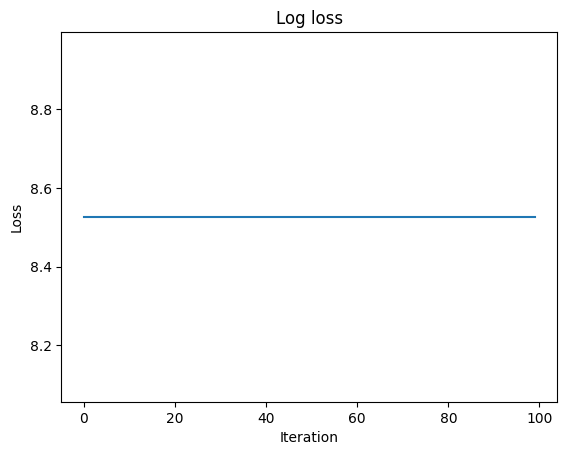

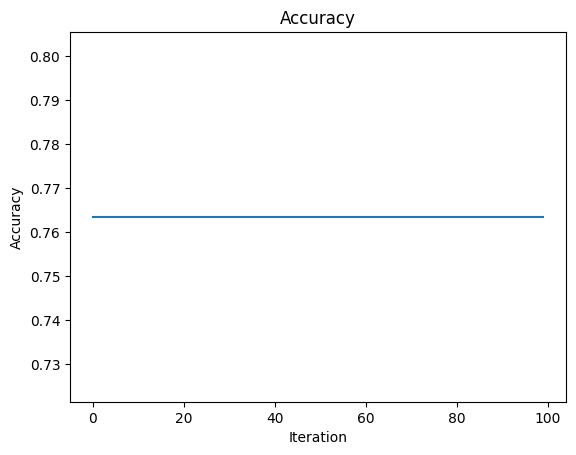

In [40]:
plt.plot(range(100), losses)
plt.title("Log loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

plt.plot(accuracies)
plt.title("Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

In [41]:
np.unique(label_test)

array([0, 1])

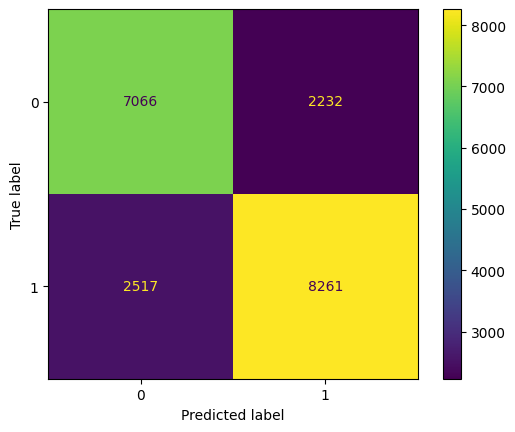

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Create a confusion matrix display object with labels
cm_display = ConfusionMatrixDisplay(cm, display_labels = [0, 1])

# Plot the confusion matrix
cm_display.plot()

In [43]:
fda = LinearDiscriminantAnalysis(n_components = 1)
fda.fit(X_train, label_train)
X_fda = fda.transform(X_train)
Xtest_fda = fda.transform(X_test)
logreg.fit(X_fda, label_train)
y_pred = logreg.predict(Xtest_fda)
print(classification_report(label_test, y_pred))
score = accuracy_score(y_pred, label_test)
print("The test accuracy: ", score * 100, '%')

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      9298
           1       0.78      0.76      0.77     10778

    accuracy                           0.75     20076
   macro avg       0.75      0.75      0.75     20076
weighted avg       0.75      0.75      0.75     20076

The test accuracy:  75.28890217174737 %


In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, label_train)
Xtest_fda = fda.transform(X_test)
y_pred = logreg.predict(Xtest_fda)
print(classification_report(label_test, y_pred))
score = accuracy_score(y_pred, label_test)
print("The test accuracy: ", score * 100, '%')